In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

import numpy
import sys
import tensorflow as tf

In [ ]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


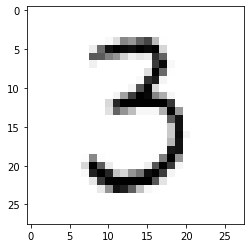

In [ ]:
# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[50], cmap='Greys')
plt.show()

In [ ]:
# 코드로 확인
for x in X_train[50]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	12	56	140	126	175	200	96	2	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	35	166	238	254	246	242	253	246	254	67	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	184	182	146	127	70	30	45	36	215	175	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	30	0	0	0	0	0	0	0	207	246	14	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	55	251	169	1	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	11	215	232	20	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	20	190	250	61	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	24	118	206	254	248	142	108	18	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	63	223	254	254	254	254	254	254	209	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	52	174	129	95	16	16	16	106	249	125	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	179	239	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0

In [ ]:
#print(X_train[0])

# 클래스 값 확인
print("class : %d " % (Y_class_train[50]))

# 바이너리화 과정
Y_train = utils.to_categorical(Y_class_train, 10)
Y_test = utils.to_categorical(Y_class_test, 10)

print(Y_train[50])

class : 3 
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [ ]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [ ]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model/01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10214, saving model to ./model/02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10214 to 0.08899, saving model to ./model/03-0.0890.hdf5

Epoch 00004: val_loss improved from 0.08899 to 0.07861, saving model to ./model/04-0.0786.hdf5

Epoch 00005: val_loss improved from 0.07861 to 0.07415, saving model to ./model/05-0.0742.hdf5

Epoch 00006: val_loss improved from 0.07415 to 0.06754, saving model to ./model/06-0.0675.hdf5

Epoch 00007: val_loss improved from 0.06754 to 0.06505, saving model to ./model/07-0.0651.hdf5

Epoch 00008: val_loss improved from 0.06505 to 0.06265, saving model to ./model/08-0.0627.hdf5

Epoch 00009: val_loss did not improve from 0.06265

Epoch 00010: val_loss did not improve from 0.06265

Epoch 00011: val_loss did not improve from 0.06265

Epoch 00012: val_loss did not improve from 0.06265

Epoch 00013: val_loss impro

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9833

 Test Accuracy: 0.9833


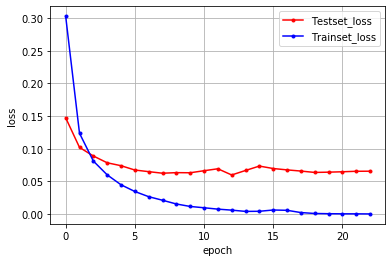

In [ ]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델 최적화 설정
MODEL_DIR = './model1/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model1/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.05428, saving model to ./model/01-0.0543.hdf5

Epoch 00002: val_loss improved from 0.05428 to 0.03938, saving model to ./model/02-0.0394.hdf5

Epoch 00003: val_loss improved from 0.03938 to 0.03696, saving model to ./model/03-0.0370.hdf5

Epoch 00004: val_loss improved from 0.03696 to 0.03236, saving model to ./model/04-0.0324.hdf5

Epoch 00005: val_loss improved from 0.03236 to 0.03097, saving model to ./model/05-0.0310.hdf5

Epoch 00006: val_loss improved from 0.03097 to 0.02937, saving model to ./model/06-0.0294.hdf5

Epoch 00007: val_loss did not improve from 0.02937

Epoch 00008: val_loss did not improve from 0.02937

Epoch 00009: val_loss did not improve from 0.02937

Epoch 00010: val_loss did not improve from 0.02937
313/313 [==============================] - 4s 13ms/step - loss: 0.0319 - accuracy: 0.9901

 Test Accuracy: 0.9901


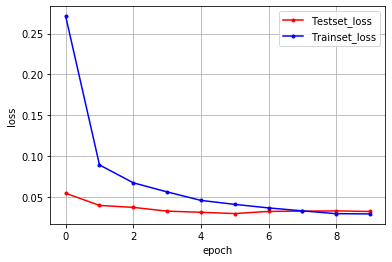

In [ ]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()